['1', 'x', 'y', 'x^2', 'x y', 'y^2']
61.00809098498438
[ 0.00000000e+00  3.71029715e-01 -1.53603971e+01  9.13586658e-03
 -2.31206282e-01  1.72825540e+00]


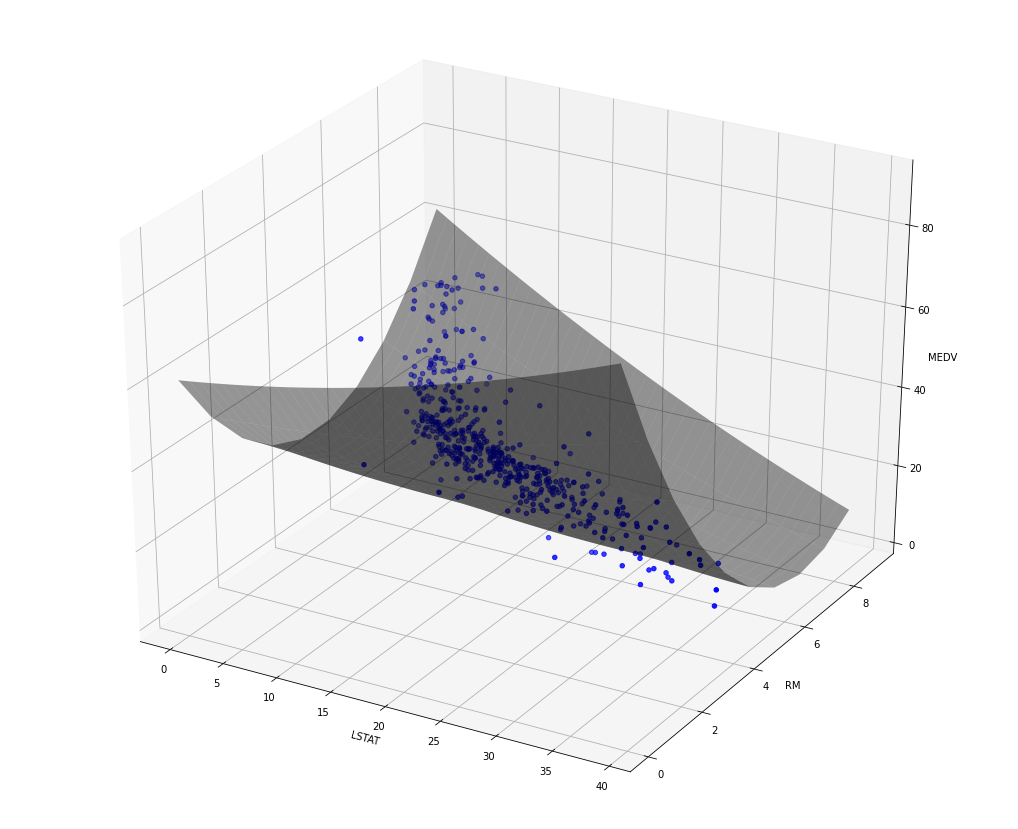

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston


dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x['LSTAT'],x['RM'],Y,c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

x_surf = np.arange(0, 40, 1)

y_surf = np.arange(0, 10, 1)

x_surf, y_surf = np.meshgrid(x_surf, y_surf)

degree = 2
polynomial_features= PolynomialFeatures(degree = degree)
x_poly = polynomial_features.fit_transform(x)
print(polynomial_features.get_feature_names(['x','y']))

model = LinearRegression()
model.fit(x_poly, Y)

print(model.intercept_)
print(model.coef_)
z = lambda x,y: (model.intercept_ +
(model.coef_[1] * x) +
(model.coef_[2] * y) +
(model.coef_[3] * x**2) +
(model.coef_[4] * x*y) +
(model.coef_[5] * y**2))
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
rstride=1,
cstride=1,
color='None',
alpha = 0.4)
plt.show()